## Import Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
sns.set(style="ticks", color_codes=True)

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load the Dataset:

In [3]:
df = pd.read_csv('Data Scientist imdb_data_v2.csv')
df.shape ##len(df)

(5787, 38)

## Check for duplicate index or rows

In [4]:
idsUnique = len(set(df.index))
idsTotal = df.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

There are 0 duplicate IDs for 5787 total entries


## Removing duplicates

In [5]:
x = df.duplicated().sum()
print("No of Duplicate Values", x)
df.drop_duplicates(inplace=True)
y = df.duplicated().sum()
print("No of Duplicate Values after cleaning", y)
print("Size of DataFrame after cleaning", len(df))

No of Duplicate Values 744
No of Duplicate Values after cleaning 0
Size of DataFrame after cleaning 5043


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5043 entries, 0 to 5042
Data columns (total 38 columns):
id                                      5043 non-null int64
stock_market_idx                        5043 non-null int64
days_since_last_tweet                   5043 non-null int64
pre_screen_viewers                      5043 non-null int64
characters_per_longest_review           5043 non-null int64
priority                                5043 non-null int64
longest_facebook_comment_review_char    5043 non-null int64
color                                   5024 non-null object
director_name                           4939 non-null object
num_critic_for_reviews                  4993 non-null float64
duration                                5028 non-null float64
director_facebook_likes                 4939 non-null float64
actor_3_facebook_likes                  5020 non-null float64
actor_2_name                            5030 non-null object
actor_1_facebook_likes                  50

In [7]:
df.head(1)

,id,stock_market_idx,days_since_last_tweet,pre_screen_viewers,characters_per_longest_review,priority,longest_facebook_comment_review_char,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,made_up_column,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,website_score,budget,weighted_budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,imdb_score
0,1,1102,67,18,1181,4,250,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,7.6,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,7.9,237000000.0,236999000,2009.0,936.0,1.78,33000,7.9


#### Check when a value in a cloumn is zero

In [7]:
df[(df['imdb_score'] == 0)].count()

id                                      0
stock_market_idx                        0
days_since_last_tweet                   0
pre_screen_viewers                      0
characters_per_longest_review           0
priority                                0
longest_facebook_comment_review_char    0
color                                   0
director_name                           0
num_critic_for_reviews                  0
duration                                0
director_facebook_likes                 0
actor_3_facebook_likes                  0
actor_2_name                            0
actor_1_facebook_likes                  0
gross                                   0
genres                                  0
actor_1_name                            0
movie_title                             0
num_voted_users                         0
cast_total_facebook_likes               0
made_up_column                          0
actor_3_name                            0
facenumber_in_poster              

## Lets work in Genres variable: Split the column by delimiter (|)

In [9]:
df['Genres_1'] = df['genres'].str.split('|').str[0]
df['Genres_2'] = df['genres'].str.split('|').str[1]
#df['Genres_3'] = df['genres'].str.split('|').str[3]

In [10]:
df.head(2)

,id,stock_market_idx,days_since_last_tweet,pre_screen_viewers,characters_per_longest_review,priority,longest_facebook_comment_review_char,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,made_up_column,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,website_score,budget,weighted_budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,imdb_score,Genres_1,Genres_2
0,1,1102,67,18,1181,4,250,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,7.6,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,7.9,237000000.0,236999000,2009.0,936.0,1.78,33000,7.9,Action,Adventure
1,2,1117,70,18,1196,4,740,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,7.2,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,7.1,300000000.0,299999000,2007.0,5000.0,2.35,0,7.1,Action,Adventure


In [11]:
genre_yr = df.loc[:,['title_year','genres']]
temp = genre_yr['genres'].str.split('|',expand = True)
all_genres = pd.unique(temp[:].values.ravel('K'))
all_genres

array(['Action', 'Documentary', 'Adventure', 'Drama', 'Animation',
       'Comedy', 'Mystery', 'Fantasy', 'Crime', 'Biography', 'Sci-Fi',
       'Horror', 'Romance', 'Thriller', 'Game-Show', 'Family', 'Music',
       'Western', 'Musical', 'Film-Noir', 'History', None, 'War', 'Sport',
       'Reality-TV', 'Short', 'News'], dtype=object)

#### Taking first two genres

In [12]:
genre_yr = df.loc[:,['title_year','Genres_1','Genres_2']]
genre_yr.head()

,title_year,Genres_1,Genres_2
0,2009.0,Action,Adventure
1,2007.0,Action,Adventure
2,2015.0,Action,Adventure
3,2012.0,Action,Thriller
4,NaN,Documentary,NaN


In [13]:
genre_yr.Genres_1.value_counts()

Comedy         1329
Action         1153
Drama           972
Adventure       453
Crime           349
Biography       252
Horror          232
Documentary      84
Animation        61
Fantasy          53
Mystery          33
Thriller         22
Sci-Fi           13
Western          12
Family           11
Romance           6
Musical           4
Game-Show         1
Music             1
Film-Noir         1
History           1
Name: Genres_1, dtype: int64

In [14]:
genre_yr.Genres_2.value_counts()

Drama          1204
Adventure       470
Crime           410
Romance         390
Comedy          341
Horror          214
Thriller        207
Mystery         205
Family          181
Fantasy         159
Animation       147
Sci-Fi          123
Music            92
History          67
Sport            48
Biography        37
War              34
Musical          30
Documentary      29
Western          15
Film-Noir         3
Short             2
Reality-TV        1
News              1
Name: Genres_2, dtype: int64

## Checking missing values

In [15]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'],sort=True)
missing_data

,Total,%
Genres_1,0,0.0
Genres_2,633,12.6
actor_1_facebook_likes,7,0.1
actor_1_name,7,0.1
actor_2_facebook_likes,13,0.3
actor_2_name,13,0.3
actor_3_facebook_likes,23,0.5
actor_3_name,23,0.5
aspect_ratio,329,6.5
budget,492,9.8


#### Variables with maximum percentage of missing values: gross: 17.5%, Genres_2: 12.6%, budget: 9.8%.

In [16]:
is_null=df.isnull().sum().sort_values(ascending=False)
NaN_df=(is_null[is_null>0])
dict(NaN_df)
NaN_df

gross                      884
Genres_2                   633
budget                     492
aspect_ratio               329
content_rating             303
plot_keywords              153
title_year                 108
director_facebook_likes    104
director_name              104
num_critic_for_reviews      50
actor_3_name                23
actor_3_facebook_likes      23
num_user_for_reviews        21
color                       19
duration                    15
facenumber_in_poster        13
actor_2_facebook_likes      13
actor_2_name                13
language                    12
actor_1_name                 7
actor_1_facebook_likes       7
country                      5
dtype: int64

#### Visualization of missing values

Text(0.5, 1.0, 'Missing  Data In The Dataset')

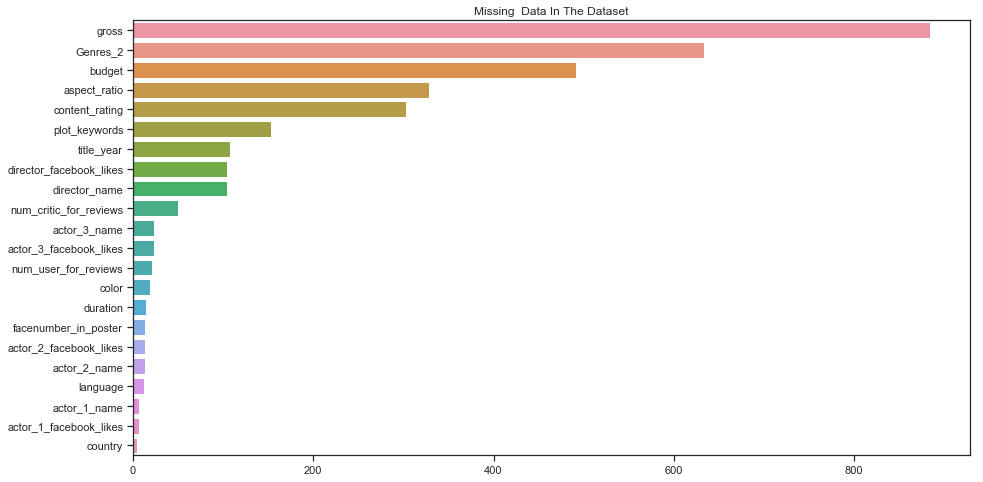

In [17]:
plt.figure(figsize=(15, 8))
sns.barplot(NaN_df,NaN_df.index)
plt.title('Missing  Data In The Dataset')

### Observe outliers for variables

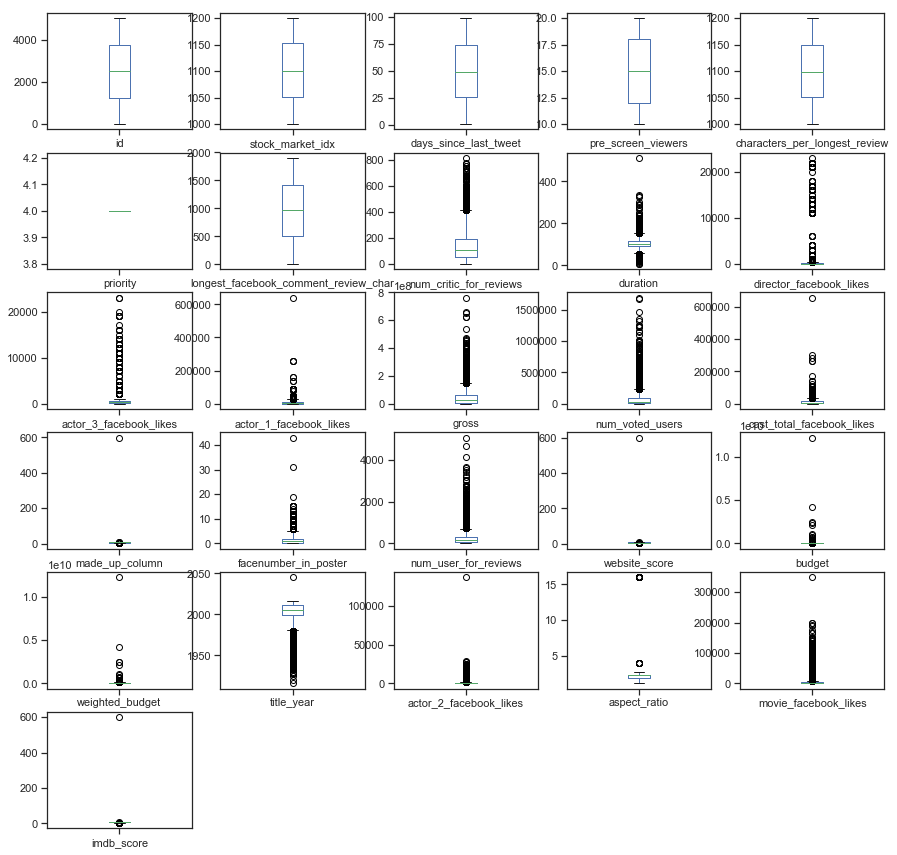

In [18]:
df.plot(kind='box',subplots=True,layout=(6,5),sharex=False, sharey=False,figsize=(15, 15))
plt.show()

### For scoring in range(0-10), we can remove outlier of imdb_score

In [19]:
df =df[(df['imdb_score']<= 10)]

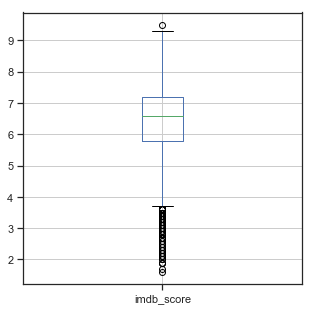

In [20]:
df.boxplot(column='imdb_score', return_type='axes',figsize=(5, 5));

## Impute Missing values on the basis of outliers:
#### Numeric variables without outliers: 'stock_market_idx', 'days_since_last_tweet', 'pre_screen_viewers', 'characters_per_longest_review', longest_facebook_comment_review_char'
#### Numeric variables with outliers: num_critic_for_reviews, 'duration', 'director_facebook_likes', 'actor_3_facebook_likes','actor_1_facebook_likes', 'gross', 'made_up_column','facenumber_in_poster', 'weighted_budget', 'title_year','actor_2_facebook_likes', 'aspect_ratio', 'movie_facebook_likes','imdb_score'

### Missing values of the columns with outliers are replaced by MEDIAN

In [21]:
df=df.fillna(df[['num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes',
    'actor_1_facebook_likes','gross','facenumber_in_poster','title_year','actor_2_facebook_likes','aspect_ratio']].median())

### Missing values of the columns without outliers are replaced by MEAN

In [22]:
df=df.fillna(df[['days_since_last_tweet','pre_screen_viewers']].mean())

In [23]:
is_null=df.isnull().sum().sort_values(ascending=False)
NaN_df=(is_null[is_null>0])
dict(NaN_df)
NaN_df

Genres_2                633
budget                  492
content_rating          303
plot_keywords           153
director_name           104
actor_3_name             23
num_user_for_reviews     21
color                    19
actor_2_name             13
language                 12
actor_1_name              7
country                   5
dtype: int64

### Remove missing rows of object type missing values

In [24]:
df.dropna(inplace=True)
df.isnull().sum()

id                                      0
stock_market_idx                        0
days_since_last_tweet                   0
pre_screen_viewers                      0
characters_per_longest_review           0
priority                                0
longest_facebook_comment_review_char    0
color                                   0
director_name                           0
num_critic_for_reviews                  0
duration                                0
director_facebook_likes                 0
actor_3_facebook_likes                  0
actor_2_name                            0
actor_1_facebook_likes                  0
gross                                   0
genres                                  0
actor_1_name                            0
movie_title                             0
num_voted_users                         0
cast_total_facebook_likes               0
made_up_column                          0
actor_3_name                            0
facenumber_in_poster              

## Visualization

#### Observing the trend of Genres_1 in different years

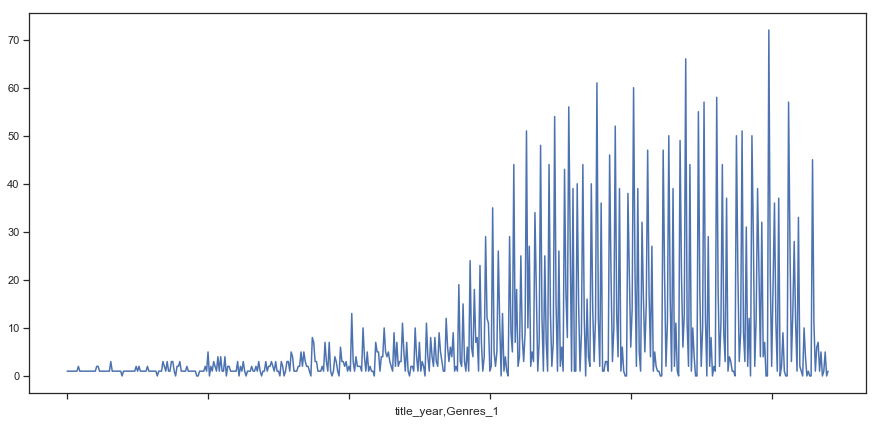

In [25]:
fig, ax = plt.subplots(figsize=(15,7))
genre_yr.groupby(['title_year','Genres_1']).count()['Genres_2'].plot(ax=ax)

#### Use unstack()

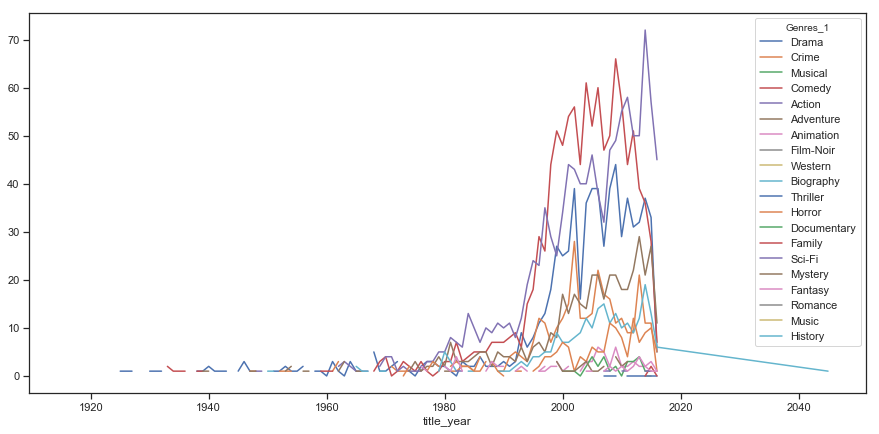

In [26]:
fig, ax = plt.subplots(figsize=(15,7))
genre_yr.groupby(['title_year','Genres_1']).count()['Genres_2'].unstack().plot(ax=ax)

#### With varieties of Genres_1 has increased significantly after 1995.

#### Plot of weighted_budget vs gross

C:\Users\rc_as\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


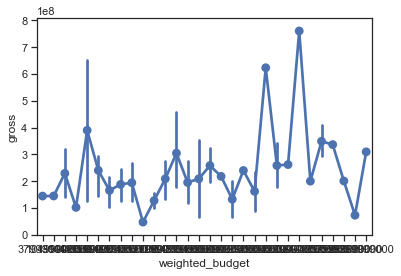

In [27]:
sns.pointplot(x="weighted_budget", y="gross", data=df[:100])

#### Scatter plot of budget and revenue, shows better correlation

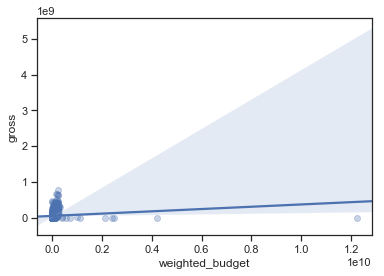

In [28]:
sns.regplot(x="weighted_budget", y="gross", data=df, scatter_kws={'alpha':0.3});

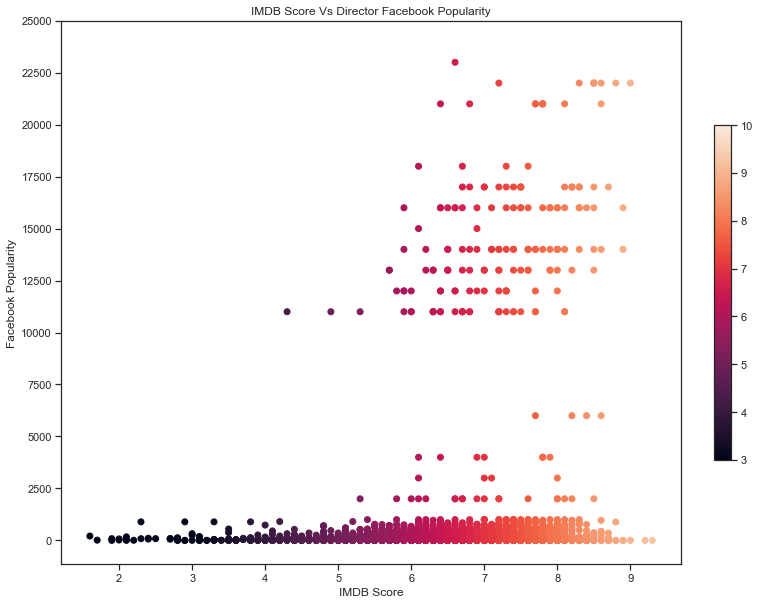

In [29]:
plt.figure(figsize=(12,10))
plt.title("IMDB Score Vs Director Facebook Popularity")
plt.xlabel("IMDB Score")
plt.ylabel("Facebook Popularity")
tmp=plt.scatter(df.imdb_score,df.director_facebook_likes,c=df.imdb_score,vmin=3,vmax=10)
plt.yticks([i*2500 for i in range(11)])
plt.colorbar(tmp,fraction=.025)
plt.show()

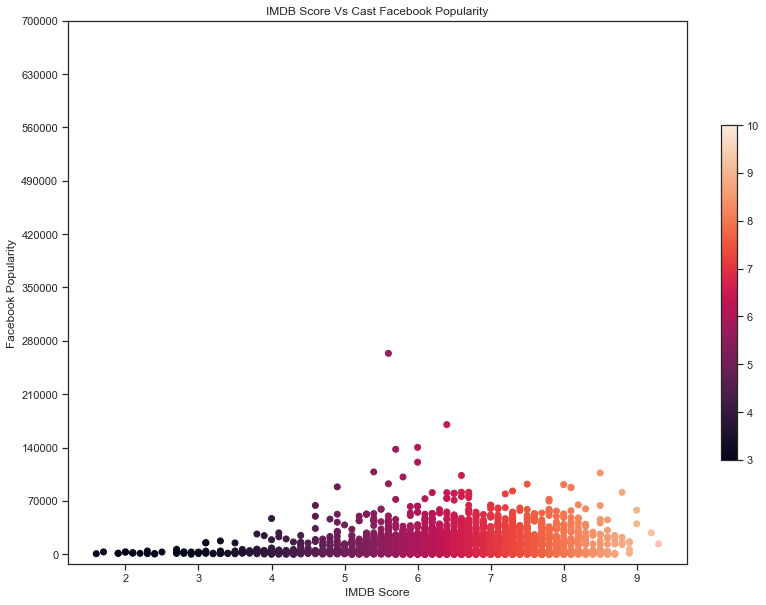

In [30]:
plt.figure(figsize=(12,10))
plt.title("IMDB Score Vs Cast Facebook Popularity")
plt.xlabel("IMDB Score")
plt.ylabel("Facebook Popularity")
tmp=plt.scatter(df.imdb_score,df.cast_total_facebook_likes,c=df.imdb_score,vmin=3,vmax=10)
plt.yticks([i*70000 for i in range(11)])
plt.colorbar(tmp,fraction=.025)
plt.show()

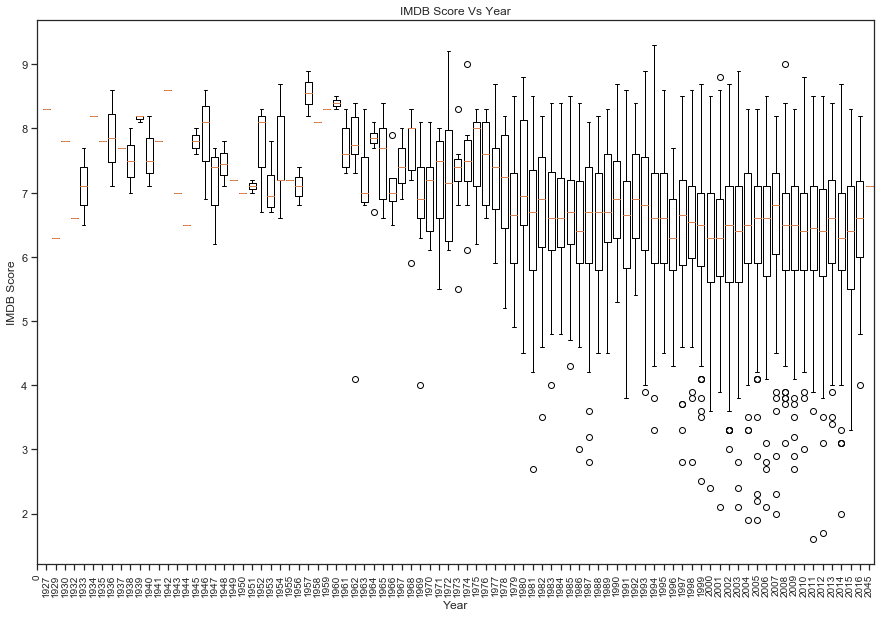

In [31]:
year=(df.title_year.unique()).astype(int)
year=sorted(year)
yearImdbScore=[]
numOfMovieByYear=[]
for i in year:
    tmp=df.imdb_score[df.title_year==i]
    yearImdbScore.append(tmp)
    numOfMovieByYear.append(len(tmp))
#plt.figure(2)
plt.figure(figsize=(15,10))
plt.title("IMDB Score Vs Year")
plt.ylabel("IMDB Score")
plt.xlabel('Year')
plt.boxplot(yearImdbScore,widths=.75)
year=list(np.insert(year,0,0))
plt.xticks(range(len(year)),year,rotation=90,fontsize=10)
plt.show()
del(year[0])

#### From 1927 to 2045, there is increase in variation of IMDB score alongwith outliers. 

In [32]:
correlation=df.corr()
correlation

,id,stock_market_idx,days_since_last_tweet,pre_screen_viewers,characters_per_longest_review,priority,longest_facebook_comment_review_char,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,made_up_column,facenumber_in_poster,num_user_for_reviews,website_score,budget,weighted_budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,imdb_score
id,1.000000,-0.006194,-0.035480,0.016669,0.027968,NaN,-0.021757,-0.355989,-0.275710,-0.103071,-0.204018,-0.234516,-0.481693,-0.331751,-0.286952,0.018750,-0.004074,-0.322238,0.027092,-0.122175,-0.122175,-0.259241,-0.249742,-0.279401,-0.211453,0.027092
stock_market_idx,-0.006194,1.000000,0.017390,0.001591,-0.023415,NaN,0.016183,-0.013746,0.005548,-0.013427,-0.004066,0.023389,-0.003878,-0.011710,0.023295,-0.009050,-0.006242,-0.024200,-0.007388,0.016209,0.016209,0.017969,0.025050,0.016731,-0.009139,-0.007388
days_since_last_tweet,-0.035480,0.017390,1.000000,0.016025,0.020340,NaN,-0.002138,0.036728,-0.000828,-0.009727,-0.015282,0.027468,0.012450,0.032088,0.017493,-0.015062,0.018995,0.050976,-0.002448,0.005499,0.005499,0.016094,-0.001533,0.002667,0.022944,-0.002448
pre_screen_viewers,0.016669,0.001591,0.016025,1.000000,0.022796,NaN,0.021516,0.017282,0.026861,-0.007233,-0.007387,0.015468,0.001838,0.021855,0.006552,0.010716,-0.028922,0.021331,0.031201,-0.002787,-0.002787,-0.020171,-0.008848,-0.012825,0.022548,0.031201
characters_per_longest_review,0.027968,-0.023415,0.020340,0.022796,1.000000,NaN,0.032863,-0.000202,0.018715,0.000533,0.005779,0.002250,0.010235,0.011522,0.003372,0.018930,-0.001191,0.009667,0.028515,-0.010839,-0.010839,-0.028845,-0.003986,-0.031199,-0.010785,0.028515
priority,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
longest_facebook_comment_review_char,-0.021757,0.016183,-0.002138,0.021516,0.032863,NaN,1.000000,0.025091,0.003588,0.009155,0.021648,-0.001239,0.025417,0.011219,0.009573,-0.005090,0.007844,0.025433,0.007650,0.001044,0.001044,-0.006981,0.026046,0.021291,0.028939,0.007650
num_critic_for_reviews,-0.355989,-0.013746,0.036728,0.017282,-0.000202,NaN,0.025091,1.000000,0.231969,0.178015,0.270709,0.241782,0.481337,0.616028,0.315422,0.260822,-0.033346,0.588726,0.349651,0.115202,0.115202,0.370060,0.308200,0.215411,0.703624,0.349651
duration,-0.275710,0.005548,-0.000828,0.026861,0.018715,NaN,0.003588,0.231969,1.000000,0.174007,0.130700,0.126516,0.249178,0.340814,0.164480,0.276468,0.025805,0.359311,0.366480,0.065937,0.065937,-0.125409,0.163204,0.178188,0.212093,0.366480
director_facebook_likes,-0.103071,-0.013427,-0.009727,-0.007233,0.000533,NaN,0.009155,0.178015,0.174007,1.000000,0.123856,0.134755,0.137747,0.289944,0.161159,0.132699,-0.040823,0.214684,0.183922,0.018789,0.018789,-0.045071,0.143073,0.031167,0.161126,0.183922


In [33]:
#plt.figure(figsize=(15,15))
#tmp=plt.matshow(correlation,fignum=1)
#plt.xticks(range(len(correlation.columns)),correlation.columns,rotation=90,fontsize=10)
#plt.yticks(range(len(correlation.columns)),correlation.columns,fontsize=8)
#plt.colorbar(tmp,fraction=0.035)
#plt.show()

In [34]:
df['website_score'].equals(df['imdb_score'])

True

In [35]:
df.shape

(3826, 40)

#### On the basis of correlation plot and table we can remove: id, priority, movie_imdb_link, can be removed.

In [36]:
df1=df.drop(['id','priority','website_score','movie_imdb_link'], axis =1)
df1.head(2)

,stock_market_idx,days_since_last_tweet,pre_screen_viewers,characters_per_longest_review,longest_facebook_comment_review_char,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,made_up_column,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,language,country,content_rating,budget,weighted_budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,imdb_score,Genres_1,Genres_2
0,1102,67,18,1181,250,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,7.6,Wes Studi,0.0,avatar|future|marine|native|paraplegic,3054.0,English,USA,PG-13,237000000.0,236999000,2009.0,936.0,1.78,33000,7.9,Action,Adventure
1,1117,70,18,1196,740,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,7.2,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,1238.0,English,USA,PG-13,300000000.0,299999000,2007.0,5000.0,2.35,0,7.1,Action,Adventure


In [37]:
df1.shape

(3826, 36)

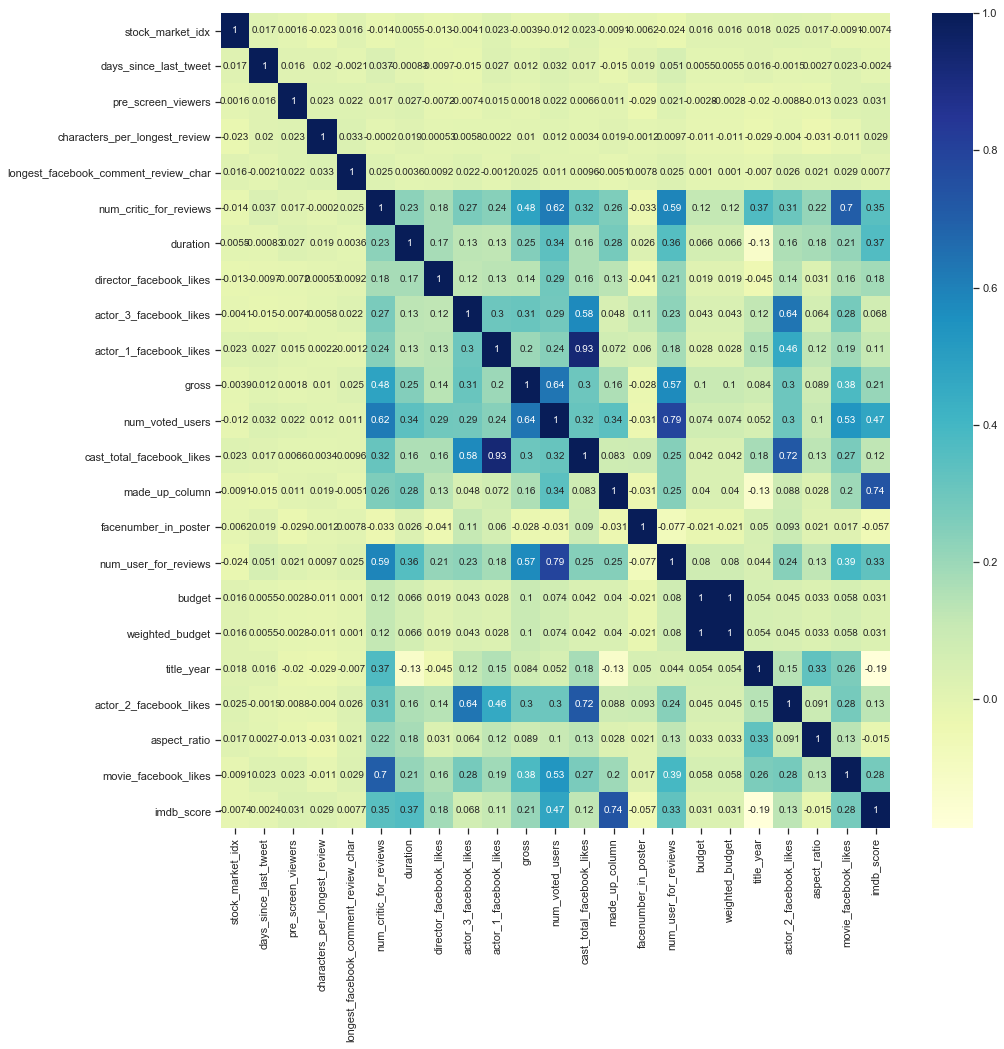

In [38]:
plt.subplots(figsize=(15, 15))
sns.heatmap(df1.corr(), annot=True, cmap="YlGnBu") ##cmap="RdYlGn" for red, yellow, and green
plt.show()

##### Remove highly correlated (>or = 0.78) independent variables: budget, cast_total_facebook_likes, num_user_for_reviews, num_voted_users

In [39]:
df2=df1.drop(['budget','cast_total_facebook_likes','num_user_for_reviews','num_voted_users','genres'],axis =1)
df2.head(2)

,stock_market_idx,days_since_last_tweet,pre_screen_viewers,characters_per_longest_review,longest_facebook_comment_review_char,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,made_up_column,actor_3_name,facenumber_in_poster,plot_keywords,language,country,content_rating,weighted_budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,imdb_score,Genres_1,Genres_2
0,1102,67,18,1181,250,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,7.6,Wes Studi,0.0,avatar|future|marine|native|paraplegic,English,USA,PG-13,236999000,2009.0,936.0,1.78,33000,7.9,Action,Adventure
1,1117,70,18,1196,740,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,7.2,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,English,USA,PG-13,299999000,2007.0,5000.0,2.35,0,7.1,Action,Adventure


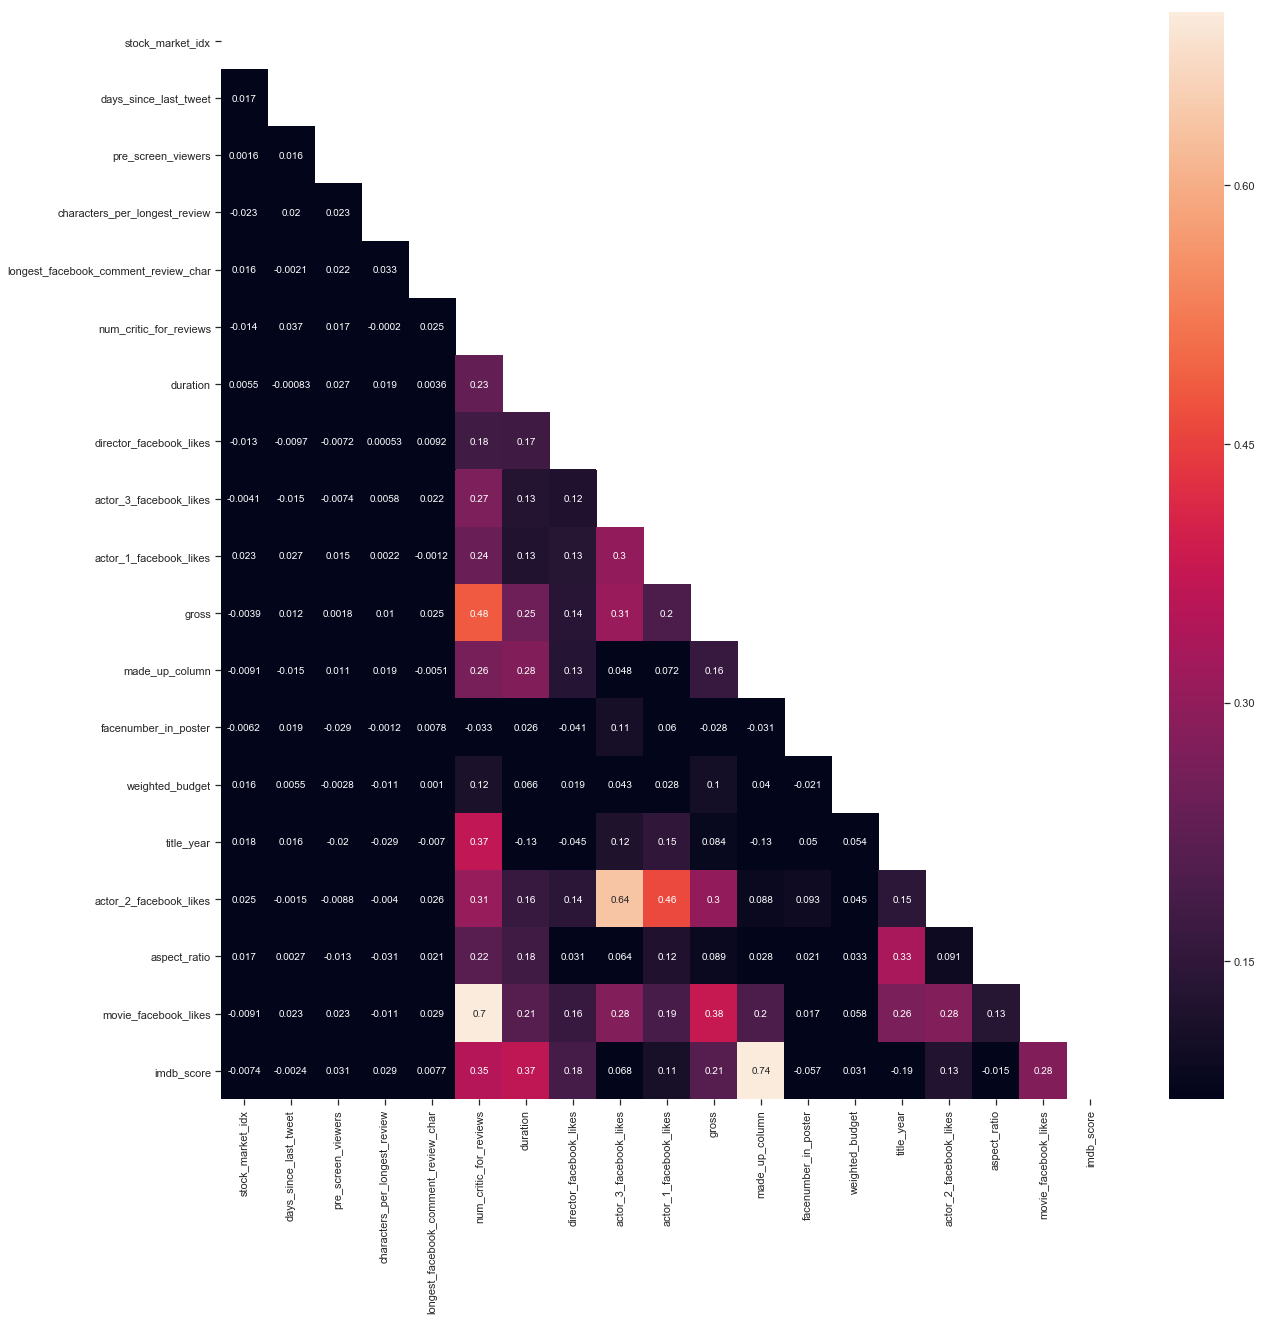

In [40]:
corr_matrix = df2.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr_matrix, mask=mask, vmax=0.7, vmin=0.07, annot=True)

In [41]:
df2.describe()

,stock_market_idx,days_since_last_tweet,pre_screen_viewers,characters_per_longest_review,longest_facebook_comment_review_char,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,made_up_column,facenumber_in_poster,weighted_budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,imdb_score
count,3826.000000,3826.000000,3826.000000,3826.000000,3826.000000,3826.000000,3826.000000,3826.000000,3826.000000,3826.000000,3.826000e+03,3826.000000,3826.000000,3.826000e+03,3826.000000,3826.000000,3826.000000,3826.000000,3826.000000
mean,1101.263461,49.847883,14.978045,1099.726607,956.108207,158.673027,110.077627,788.375588,734.684266,7236.228960,5.131063e+07,6.458285,1.328280,4.456557e+07,2001.771824,1891.055672,2.112394,8909.085991,6.455332
std,58.173076,28.474520,3.154752,57.504164,539.568100,124.042590,22.868913,3032.138402,1847.700376,11359.471525,6.899313e+07,1.467704,1.929589,2.237875e+08,12.379424,3868.761024,0.278556,21322.018309,1.071581
min,1000.000000,1.000000,10.000000,1000.000000,6.000000,1.000000,25.000000,0.000000,0.000000,0.000000,1.620000e+02,0.700000,0.000000,-7.820000e+02,1927.000000,0.000000,1.180000,0.000000,1.600000
25%,1051.000000,26.000000,12.000000,1050.000000,511.000000,68.000000,95.000000,10.000000,175.000000,697.500000,1.073479e+07,5.500000,0.000000,8.924000e+06,1998.000000,346.250000,1.850000,0.000000,5.900000
50%,1101.000000,49.000000,15.000000,1099.000000,951.500000,129.000000,106.000000,58.000000,416.500000,1000.000000,2.550022e+07,6.500000,1.000000,2.299900e+07,2004.000000,652.500000,2.350000,204.000000,6.600000
75%,1152.000000,74.000000,18.000000,1149.000000,1415.000000,215.000000,120.000000,219.750000,681.000000,12000.000000,6.248456e+07,7.400000,2.000000,4.999900e+07,2010.000000,968.000000,2.350000,10000.000000,7.200000
max,1200.000000,99.000000,20.000000,1200.000000,1900.000000,813.000000,330.000000,23000.000000,23000.000000,260000.000000,7.605058e+08,10.500000,43.000000,1.221550e+10,2045.000000,29000.000000,2.760000,349000.000000,9.300000


In [42]:
df2.shape

(3826, 31)

### Label Encoding and One Hot Encoding:

In [43]:
df2.Genres_1.nunique()

17

In [44]:
df2.Genres_2.nunique()

21

In [45]:
df3 = pd.get_dummies(df2, columns = ['color','Genres_1','Genres_2'], prefix = ['color','Genres_1','Genres_2'])

In [46]:
df3.head(1)

,stock_market_idx,days_since_last_tweet,pre_screen_viewers,characters_per_longest_review,longest_facebook_comment_review_char,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,made_up_column,actor_3_name,facenumber_in_poster,plot_keywords,language,country,content_rating,weighted_budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,imdb_score,color_ Black and White,color_Color,Genres_1_Action,Genres_1_Adventure,Genres_1_Animation,Genres_1_Biography,Genres_1_Comedy,Genres_1_Crime,Genres_1_Documentary,Genres_1_Drama,Genres_1_Family,Genres_1_Fantasy,Genres_1_Film-Noir,Genres_1_Horror,Genres_1_Musical,Genres_1_Mystery,Genres_1_Romance,Genres_1_Sci-Fi,Genres_1_Thriller,Genres_2_Adventure,Genres_2_Animation,Genres_2_Biography,Genres_2_Comedy,Genres_2_Crime,Genres_2_Documentary,Genres_2_Drama,Genres_2_Family,Genres_2_Fantasy,Genres_2_Film-Noir,Genres_2_History,Genres_2_Horror,Genres_2_Music,Genres_2_Musical,Genres_2_Mystery,Genres_2_Romance,Genres_2_Sci-Fi,Genres_2_Sport,Genres_2_Thriller,Genres_2_War,Genres_2_Western
0,1102,67,18,1181,250,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,7.6,Wes Studi,0.0,avatar|future|marine|native|paraplegic,English,USA,PG-13,236999000,2009.0,936.0,1.78,33000,7.9,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [47]:
df3.shape

(3826, 68)

#### Correlation of independent variables with dependent variables:

Text(0.5, 1.0, 'Brief Correlation Graph of Features and imdb_score')

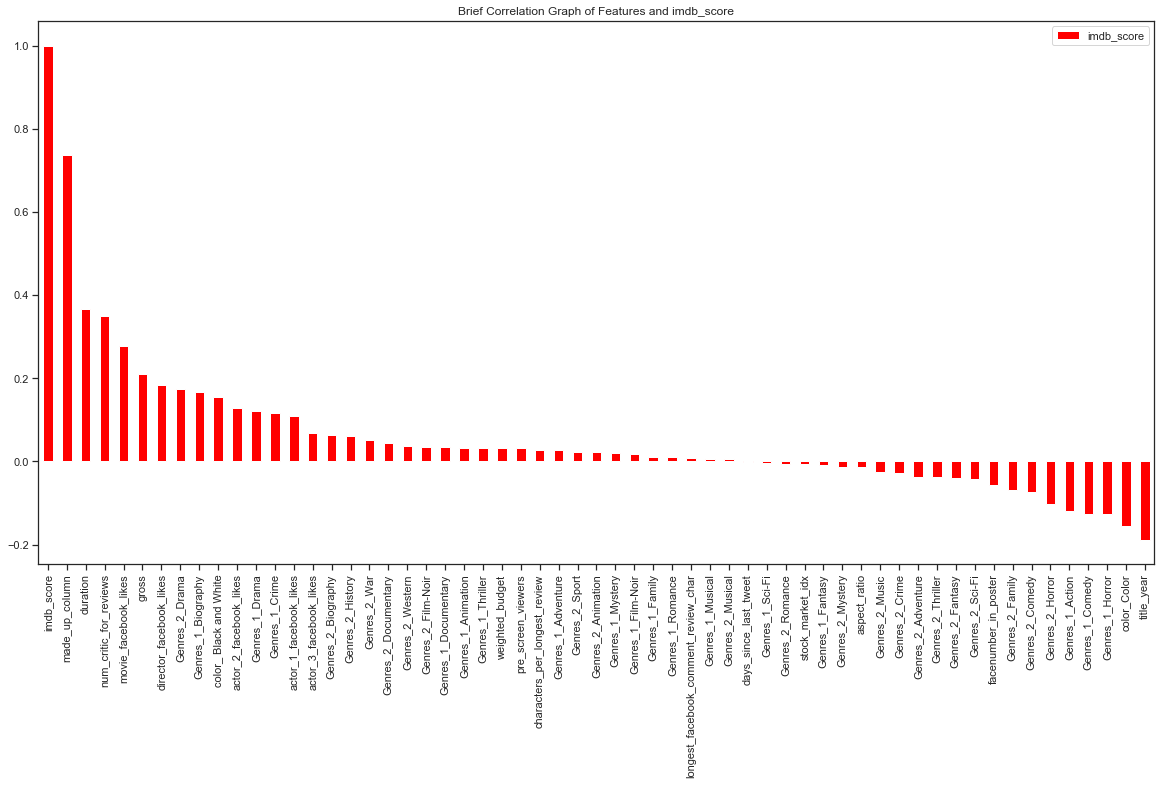

In [48]:
target_var=pd.DataFrame(df3.corr()['imdb_score'].sort_values(ascending=False))
target_var.plot(kind='bar',figsize=(20,10),color='red')
plt.title('Brief Correlation Graph of Features and imdb_score')

##### made_up_column, duration, num_critic_for_reviews, movie_facebook_likes, Genres_2_Drama, Genres_1_Biography, actor_2_facebook_likes are top 5 variables highly correlated with imdb_score in order.
##### title_year, color_Color, Genres_1_Horror, Genres_1_Comedy, Genres_1_Action, Genres_2_Horror, Genres_2_Comedy, Genres_2_Family, facenumber_in_poster are more negatively correlated with imdb_score.

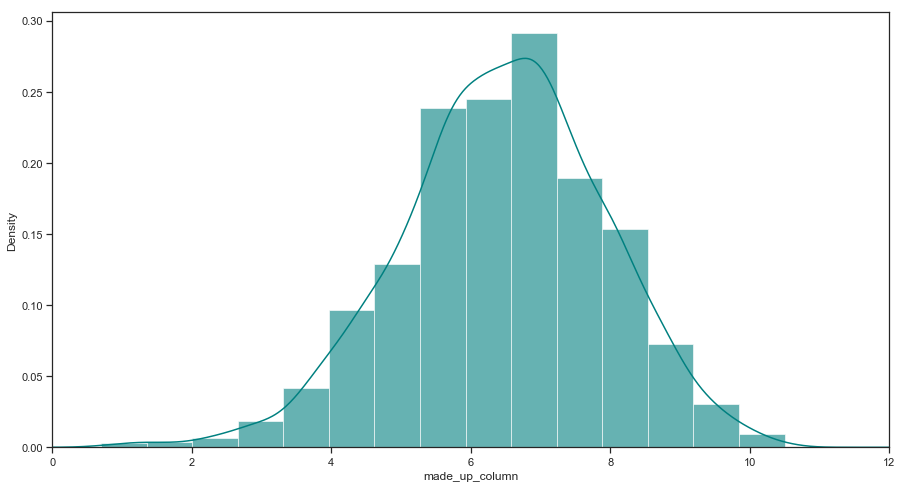

In [49]:
plt.figure(figsize=(15,8))
ax = df3["made_up_column"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
df3["made_up_column"].plot(kind='density', color='teal')
ax.set(xlabel='made_up_column')
plt.xlim(0, 12)
plt.show()

#### here, most of the values falls around 7, which means maximum values of made_up_column is around 7. Since, made_up_column is highly correlated with imdb_score, meaning, maximum score of imdb_score falls around 7.

C:\Users\rc_as\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


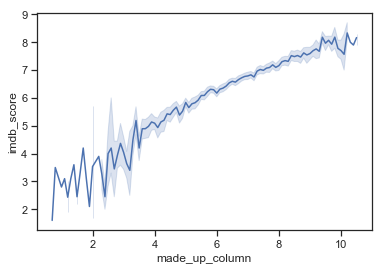

In [50]:
axes = sns.lineplot(data=df3, x='made_up_column', y='imdb_score')

#### made_up_column has clear correlation with imdb_score

#### On the basis of correlation plot we can remove following variables: director_name', 'actor_2_name', 'actor_1_name', 'movie_title', 'actor_3_name', 'plot_keywords', 'language', 'country'.

In [74]:
df4=df3.drop(['director_name','actor_2_name','actor_1_name','movie_title','actor_3_name','plot_keywords','language',
            'country'],axis =1)
df4.head(2)

,stock_market_idx,days_since_last_tweet,pre_screen_viewers,characters_per_longest_review,longest_facebook_comment_review_char,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,made_up_column,facenumber_in_poster,content_rating,weighted_budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,imdb_score,color_ Black and White,color_Color,Genres_1_Action,Genres_1_Adventure,Genres_1_Animation,Genres_1_Biography,Genres_1_Comedy,Genres_1_Crime,Genres_1_Documentary,Genres_1_Drama,Genres_1_Family,Genres_1_Fantasy,Genres_1_Film-Noir,Genres_1_Horror,Genres_1_Musical,Genres_1_Mystery,Genres_1_Romance,Genres_1_Sci-Fi,Genres_1_Thriller,Genres_2_Adventure,Genres_2_Animation,Genres_2_Biography,Genres_2_Comedy,Genres_2_Crime,Genres_2_Documentary,Genres_2_Drama,Genres_2_Family,Genres_2_Fantasy,Genres_2_Film-Noir,Genres_2_History,Genres_2_Horror,Genres_2_Music,Genres_2_Musical,Genres_2_Mystery,Genres_2_Romance,Genres_2_Sci-Fi,Genres_2_Sport,Genres_2_Thriller,Genres_2_War,Genres_2_Western
0,1102,67,18,1181,250,723.0,178.0,0.0,855.0,1000.0,760505847.0,7.6,0.0,PG-13,236999000,2009.0,936.0,1.78,33000,7.9,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1117,70,18,1196,740,302.0,169.0,563.0,1000.0,40000.0,309404152.0,7.2,0.0,PG-13,299999000,2007.0,5000.0,2.35,0,7.1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Data modeling
#### Use Linear Regression Model to identify significant variable

In [75]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.formula.api as smf

#### Variables renaming to remove space between words

In [76]:
df4.rename(columns={'color_ Black and White':'color_ Black_and_White'},inplace=True)

In [77]:
formula ='imdb_score~stock_market_idx+ days_since_last_tweet+ pre_screen_viewers+ characters_per_longest_review+ longest_facebook_comment_review_char+num_critic_for_reviews+ duration+ director_facebook_likes+ actor_3_facebook_likes+actor_1_facebook_likes+gross+ made_up_column+ facenumber_in_poster+content_rating+weighted_budget+ title_year+actor_2_facebook_likes+  aspect_ratio+ movie_facebook_likes+ color_Color+ Genres_1_Action+ Genres_1_Adventure+ Genres_1_Animation+ Genres_1_Biography+ Genres_1_Comedy+ Genres_1_Crime+ Genres_1_Documentary+  Genres_1_Drama+ Genres_1_Family+ Genres_1_Fantasy+  Genres_1_Horror+   Genres_1_Musical+ Genres_1_Mystery+ Genres_1_Romance+Genres_1_Thriller+Genres_2_Adventure+ Genres_2_Animation+ Genres_2_Biography+  Genres_2_Comedy+ Genres_2_Crime+ Genres_2_Documentary+Genres_2_Drama+Genres_2_Family+Genres_2_Fantasy+Genres_2_History+Genres_2_Horror+Genres_2_Music+ Genres_2_Musical+Genres_2_Mystery+ Genres_2_Romance+ Genres_2_Sport+Genres_2_Thriller+ Genres_2_War+ Genres_2_Western'

In [78]:
results = smf.ols(formula, data = df4).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             imdb_score   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     111.2
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        16:33:26   Log-Likelihood:                -3602.1
No. Observations:                3826   AIC:                             7340.
Df Residuals:                    3758   BIC:                             7765.
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               38.9302      2.439     15.962      0.000      34.148      43.712
content_rating[T.G]                      0.0301      0.123      0.245      0.806      -0.211       0.271
content_rating[T.GP]                    -0.1241      0.375     -0.331      0.741      -0.860       0.612
content_rating[T.M]                     -0.0815      0.376     -0.217      0.828      -0.818       0.655
content_rating[T.NC-17]                  0.2058      0.301      0.683      0.494      -0.385       0.796
content_rating[T.Not Rated]              0.2265      0.131      1.727      0.084      -0.031       0.484
content_rating[T.PG]                     0.0850      0.109      0.779      0.436      -0.129       0.299
content_rating[T.PG-13]                  0.0399      0.111      0.360      0.719      -0.177       0.257
content_rating[T.Passed]                -0.4488      0.249     -1.804      0.071      -0.937       0.039
content_rating[T.R]                      0.2214      0.109      2.029      0.043       0.007       0.435
content_rating[T.TV-14]                  0.4843      0.638      0.759      0.448      -0.766       1.735
content_rating[T.TV-G]                   0.1991      0.378      0.527      0.598      -0.541       0.940
content_rating[T.TV-PG]                  0.3297      0.458      0.720      0.472      -0.568       1.228
content_rating[T.Unrated]                0.1052      0.146      0.721      0.471      -0.181       0.391
content_rating[T.X]                     -0.1089      0.233     -0.468      0.640      -0.565       0.347
stock_market_idx                         0.0001      0.000      0.846      0.398      -0.000       0.000
days_since_last_tweet                -2.205e-05      0.000     -0.061      0.951      -0.001       0.001
pre_screen_viewers                       0.0022      0.003      0.682      0.495      -0.004       0.009
characters_per_longest_review            0.0002      0.000      1.027      0.305      -0.000       0.001
longest_facebook_comment_review_char  7.193e-06   1.89e-05      0.380      0.704   -2.99e-05    4.43e-05
num_critic_for_reviews                   0.0022      0.000     15.881      0.000       0.002       0.003
duration                                 0.0041      0.001      7.502      0.000       0.003       0.005
director_facebook_likes               6.745e-06   3.52e-06      1.917      0.055   -1.53e-07    1.36e-05
actor_3_facebook_likes               -1.867e-05   7.29e-06     -2.559      0.011    -3.3e-05   -4.37e-06
actor_1_facebook_likes                1.984e-06   1.03e-06      1.931      0.054   -3.01e-08       4e-06
gross                                 4.961e-10   1.97e-10      2.512      0.012    1.09e-10    8.83e-10
made_up_column                        

## Features selection:

### 1. Backward Elimination method

In [109]:
X=df4[['stock_market_idx','days_since_last_tweet','pre_screen_viewers','characters_per_longest_review',
     'longest_facebook_comment_review_char','num_critic_for_reviews','duration','director_facebook_likes',
     'actor_3_facebook_likes','actor_1_facebook_likes','gross','made_up_column','facenumber_in_poster',
     'weighted_budget','title_year','actor_2_facebook_likes','aspect_ratio','movie_facebook_likes', 
     'color_Color','Genres_1_Action','Genres_1_Adventure','Genres_1_Animation','Genres_1_Biography','Genres_1_Comedy', 
     'Genres_1_Crime','Genres_1_Documentary','Genres_1_Drama','Genres_1_Family','Genres_1_Fantasy','Genres_1_Horror',  
     'Genres_1_Musical','Genres_1_Mystery','Genres_1_Romance','Genres_1_Thriller','Genres_2_Adventure','Genres_2_Animation',
     'Genres_2_Biography','Genres_2_Comedy','Genres_2_Crime','Genres_2_Documentary','Genres_2_Drama','Genres_2_Family',
     'Genres_2_Fantasy','Genres_2_History','Genres_2_Horror','Genres_2_Music','Genres_2_Musical','Genres_2_Mystery',
     'Genres_2_Romance','Genres_2_Sport','Genres_2_Thriller','Genres_2_War','Genres_2_Western']]

In [110]:
X1=df4[['stock_market_idx','days_since_last_tweet','pre_screen_viewers','characters_per_longest_review',
     'longest_facebook_comment_review_char','num_critic_for_reviews','duration','director_facebook_likes',
     'actor_3_facebook_likes','actor_1_facebook_likes','gross','made_up_column','facenumber_in_poster',
     'weighted_budget','title_year','actor_2_facebook_likes','aspect_ratio','movie_facebook_likes', 
     'color_Color','Genres_1_Action','Genres_1_Adventure','Genres_1_Animation','Genres_1_Biography','Genres_1_Comedy', 
     'Genres_1_Crime','Genres_1_Documentary','Genres_1_Drama','Genres_1_Family','Genres_1_Fantasy','Genres_1_Horror',  
     'Genres_1_Musical','Genres_1_Mystery','Genres_1_Romance','Genres_1_Thriller','Genres_2_Adventure','Genres_2_Animation',
     'Genres_2_Biography','Genres_2_Comedy','Genres_2_Crime','Genres_2_Documentary','Genres_2_Drama','Genres_2_Family',
     'Genres_2_Fantasy','Genres_2_History','Genres_2_Horror','Genres_2_Music','Genres_2_Musical','Genres_2_Mystery',
     'Genres_2_Romance','Genres_2_Sport','Genres_2_Thriller','Genres_2_War','Genres_2_Western']]

In [111]:
y=df4['imdb_score']

In [112]:
y1=df4['imdb_score']

In [113]:
cols = list(X1.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X1[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y1,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'made_up_column', 'facenumber_in_poster', 'title_year', 'Genres_1_Action', 'Genres_1_Adventure', 'Genres_1_Animation', 'Genres_1_Biography', 'Genres_1_Comedy', 'Genres_1_Documentary', 'Genres_1_Drama', 'Genres_1_Horror', 'Genres_2_Animation', 'Genres_2_Biography', 'Genres_2_Comedy', 'Genres_2_Crime', 'Genres_2_Documentary', 'Genres_2_Drama', 'Genres_2_Horror', 'Genres_2_Romance', 'Genres_2_Sport']


In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lr_model = LinearRegression()
lr_model.fit(X1,y1)
# Make predictions using the testing set
y1_pred = lr_model.predict(X1)
# The coefficients
#print('Coefficients: \n',lr_model.coef_)
# The mean squared error
print("Mean squared error: %.2f"
     % mean_squared_error(y1, y1_pred))
print('Variance score: %.2f' % r2_score(y1, y1_pred))

Mean squared error: 0.39
Variance score: 0.66


In [115]:
from sklearn import model_selection
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = LinearRegression()
scoring = 'neg_mean_absolute_error'
results = model_selection.cross_val_score(model, X1, y1, cv=kfold, scoring=scoring)
print("Mean Absolute Error:",results.mean(),results.std())

Mean Absolute Error: -0.4956984972653265 0.028956272585352397


In [116]:
scoring1 = 'r2'
results = model_selection.cross_val_score(model, X1, y1, cv=kfold, scoring=scoring1)
print("R^2 Metric:",results.mean(),results.std())

R^2 Metric: 0.6328376703401482 0.04345206811717793


### 2. RandomForestRegressor method

In [117]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
model = RandomForestRegressor(n_estimators=100, min_samples_leaf=8, random_state=1)
model.fit (X1, y1)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

### visualization of 10 most important features 

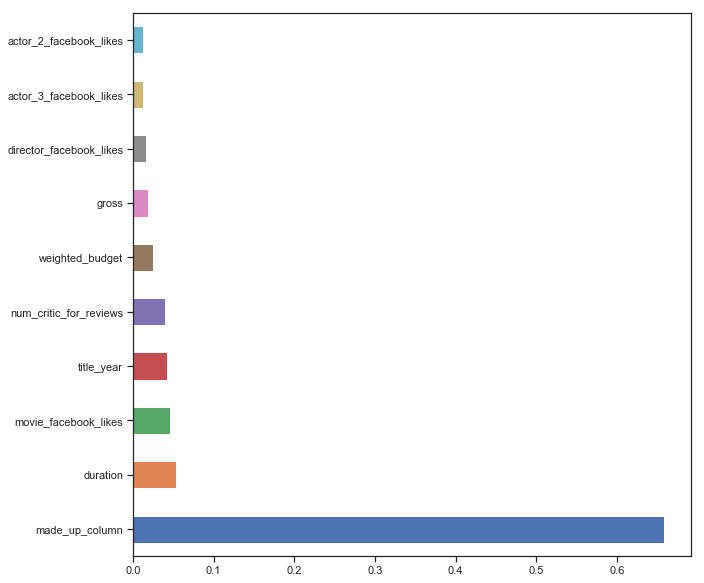

In [118]:
pd.Series(model.feature_importances_, index=X1.columns).nlargest(10).plot(kind='barh',figsize = (10,10))

In [119]:
X1, y1 = make_regression(n_features=4, n_informative=2, random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100)
regr.fit(X1, y1)  
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)
print(regr.feature_importances_)
y2=regr.predict([[0, 0, 0, 0]])

[0.18146984 0.81473937 0.00145312 0.00233767]


In [120]:
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.model_selection import cross_val_score
estimators = [2, 5, 10, 15, 60, 80]
mean_rfrs = []
std_rfrs_upper = []
std_rfrs_lower = []
yt = [i for i in y1] 
np.random.seed(11111)
for i in estimators:
    model = rfr(n_estimators=i,max_depth=None)
    scores_rfr = cross_val_score(model,X1,yt,cv=10,scoring='explained_variance')
    print('estimators:',i)
#   print('explained variance scores for k=10 fold validation:',scores_rfr)
    print("Est. explained variance: %0.2f (+/- %0.2f)" % (scores_rfr.mean(), scores_rfr.std() * 2))
    print('')
    mean_rfrs.append(scores_rfr.mean())

estimators: 2
Est. explained variance: 0.82 (+/- 0.23)

estimators: 5
Est. explained variance: 0.91 (+/- 0.09)

estimators: 10
Est. explained variance: 0.90 (+/- 0.08)

estimators: 15
Est. explained variance: 0.91 (+/- 0.08)

estimators: 60
Est. explained variance: 0.92 (+/- 0.08)

estimators: 80
Est. explained variance: 0.92 (+/- 0.09)



### 3. Decision Tree method

In [121]:
from sklearn.tree import DecisionTreeRegressor
regr_1 = DecisionTreeRegressor()
regr_1.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

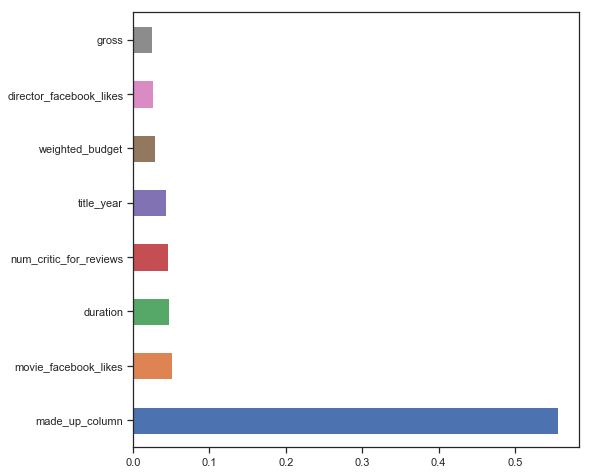

In [122]:
pd.Series(regr_1.feature_importances_, index=X.columns).nlargest(8).plot(kind='barh',figsize=(8,8))

In [123]:
regr_1 = DecisionTreeRegressor(criterion='mse', max_depth=3)         
regr_1.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [124]:
from sklearn.tree import DecisionTreeRegressor as dtr
from sklearn.model_selection import cross_val_score
# Fitting a decision tree regression model
DTR_1 = dtr(max_depth=None)
#DTR_1.fit(X,Y) # fit the training data
scores_dtr = cross_val_score(DTR_1, X, y, cv=10,scoring='explained_variance') 
print('scores for k=10 fold validation:',scores_dtr)
print("Est. explained variance: %0.2f (+/- %0.2f)" % (scores_dtr.mean(), scores_dtr.std() * 2))

scores for k=10 fold validation: [0.16522827 0.1719362  0.1837353  0.23663509 0.36374885 0.3931499
 0.41091044 0.37872647 0.37575204 0.44615165]
Est. explained variance: 0.31 (+/- 0.21)


### From above regression models and plotted graph, 10 most important variables are:
#### 1. made_up_column
#### 2. duration
#### 3. movie_facebook_likes
#### 4. title_year
#### 5. num_critic_for_reviews
#### 6. weifgted_budget
#### 7. gross
#### 8. director_facebook_likes
#### 9. actor_3_facebook_likes
#### 10. actor_2_facebook_likes

#### Explained variance score: 1 is perfect prediction

## Create train and test from processed dataset df4

In [125]:
numeric=['stock_market_idx','days_since_last_tweet','pre_screen_viewers','characters_per_longest_review',
     'longest_facebook_comment_review_char','num_critic_for_reviews','duration','director_facebook_likes',
     'actor_3_facebook_likes','actor_1_facebook_likes','gross','made_up_column','facenumber_in_poster',
     'weighted_budget','title_year','actor_2_facebook_likes','aspect_ratio','movie_facebook_likes', 
     'color_Color','Genres_1_Action','Genres_1_Adventure','Genres_1_Animation','Genres_1_Biography','Genres_1_Comedy', 
     'Genres_1_Crime','Genres_1_Documentary','Genres_1_Drama','Genres_1_Family','Genres_1_Fantasy','Genres_1_Horror',  
     'Genres_1_Musical','Genres_1_Mystery','Genres_1_Romance','Genres_1_Thriller','Genres_2_Adventure','Genres_2_Animation',
     'Genres_2_Biography','Genres_2_Comedy','Genres_2_Crime','Genres_2_Documentary','Genres_2_Drama','Genres_2_Family',
     'Genres_2_Fantasy','Genres_2_History','Genres_2_Horror','Genres_2_Music','Genres_2_Musical','Genres_2_Mystery',
     'Genres_2_Romance','Genres_2_Sport','Genres_2_Thriller','Genres_2_War','Genres_2_Western','imdb_score']
data= df4[numeric]

In [126]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(data, test_size = 0.3)
x_train = train.drop('imdb_score', axis=1)
y_train = train['imdb_score']
x_test = test.drop('imdb_score', axis = 1)
y_test = test['imdb_score']

### Scaling the features

In [127]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

C:\Users\rc_as\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\rc_as\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


### Look at the error rate for different k values

In [128]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [129]:
rmse_val = [] #to store rmse values for different k
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1.121468518341314
RMSE value for k=  2 is: 1.000471361034823
RMSE value for k=  3 is: 0.9548047699212355
RMSE value for k=  4 is: 0.9348053608734654
RMSE value for k=  5 is: 0.9281041708323351
RMSE value for k=  6 is: 0.9189993811548033
RMSE value for k=  7 is: 0.9174505406615625
RMSE value for k=  8 is: 0.9190206171882506
RMSE value for k=  9 is: 0.9204664379854653
RMSE value for k=  10 is: 0.9192924013412506


### RMSE value for k=  7 is: 0.91745 is minimum

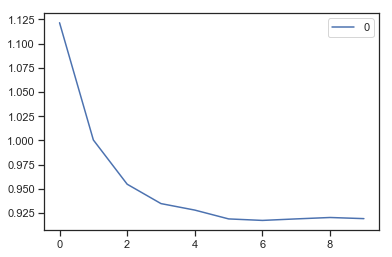

In [130]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [132]:
#mse = (((pred - y_test) ** 2).sum()) / len(pred)
#mse